<h4 align="right">Orestis Charalambous</h4> 
<h1><center><font size="50">Task 2</font></center></h1>


## Contents
* [1 Q-learning introduction](#1)
    * [1.1 Importing libraries](#1.1)
    * [1.2 Parameters for Q learning](#1.2)
    * [1.3 Construction of the Q table ](#1.3)
    * [1.4 Training ](#1.4)
    * [1.5 Evaluation and Results ](#1.5)
* [2. Q-Learning with different Q_table and parameters](#2)
    * [2.1 Modiying Environment](#2.1)
    * [2.2 Hyperparameters for Q-Learning](#2.2)
    * [2.3 Training](#2.3)
    * [2.4 Evaluation](#2.4)


## 1. Q Learning <a class="anchor" id="1"></a>

In order to use Q learning as our Reinforcement Learning algorithm for this task, the agent needs to know its state.

In our environment we will use the relative coordinates between the player and the princess as the state.

In this process we will generate two different q tables with the same maze and obstacles and look at differences.


### A bit about Q learning


Q learning is a model-free reinforcement learning algorithm. It will learn a policy which will tell it what to do given a certain situation. Over the course of training, the Q learning will update its policy to find the optimal (or the closest it can get) action given a state.

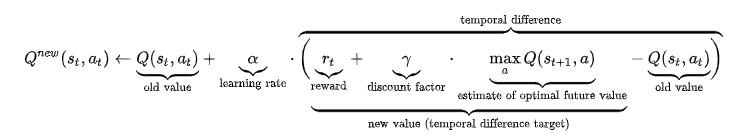

On every run the Q table is updated with a new Q value. This is defined in the above equation. This takes the existing value and multiplies it by the learned value. The learned value is a compibation of the reward from the latest move and the maximum Q value from the new state. [Source](https://en.wikipedia.org/wiki/Q-learning)

### 1.1  Importing libraries<a class="anchor" id="1.1"></a>

In [1]:
import env                     # Importing the environment from py file.
import numpy as np
import time
import random
import pickle                  # Importing pickle to store the q table.
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

# Customising style for Graphs
plt.style.use(['ggplot'])
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['grid.color']='#dcdcdc'
plt.rcParams['axes.facecolor']='white'
mpl.rcParams['font.size'] = 15
cmap = sns.diverging_palette(220, 10, as_cmap=True)

####  1.2 Parameters for Q learning <a class="anchor" id="1.2"></a>

In [2]:
SIZE = 7                   # Size of maze as a square (NxN).
NUM_EPISODES =10000          # Number of episodes.
SHOW_EVERY = 500            # Show epsilon and mean rewards every n episodes.
epsilon = 0.9               # Exploration rate.
DECAY_RATE = 0.9998          # Exploration decay rate.
load_q_table = None
episode_rewards = []
LEARNING_RATE = 0.1         # Learning rate.
gamma = 0.95                # Discounting rate

#### Creating random castle maze

We will use this so our maze stays the same for all episodes.

In [3]:
castle = env.maze(SIZE)
castle

['XXXXXXX', 'X XP  X', 'X C   X', 'X X X X', 'X   XXX', 'XA    X', 'XXXXXXX']

#### 1.3 Construction of the Q table <a class="anchor" id="1.3"></a>

The observation space is going to be a coordinate which is the Delta, relative coordinates to the princess. This is given by substracting the coordinates of the agent with the coordinates of the princess.

We are iterating through the observation space and we are adding every combination to our table with a tuple and initialising it with the numpy random uniform distribution for the discrete 4 actions.

In [4]:
if load_q_table is None:
    q_table = {}
    for x1 in range(-SIZE + 1, SIZE):
        for y1 in range(-SIZE + 1, SIZE):
            for x2 in range(-SIZE + 1, SIZE):
                for y2 in range(-SIZE + 1, SIZE):
                    q_table[((x1, y1),(x2, y2))] = [np.random.uniform(-5, 0) for i in range(4)]
else:
    with open(load_q_table, "rb") as f:
        q_table = pickle.load(f)

#### 1.4 Training <a class="anchor" id="1.4"></a>

Here we will implement the Q-Learning algorithm with the epsilon greedy policy.

We start by choosing a random number between (0,1). If that number is less than epsilon, the exploration rate, we explore with a random action. On the other hand, if the random number is greater than epsilon, we choose an action based on the current state of the agent based on the class with the largest predicted probability of our Q-table.

The Agent makes that action and a new Q value is updated on the Q-table based on the new observation.


### <b>WARNING: THIS CAN TAKE UP TO HALF AN HOUR TO RUN FOR 10000 EPISODES!!!</b>

<b>Run time is caused because turtle graphics updates in lower frames than any other library or numpys arrays. This was not known at the beginning of the project and I apologise for the inconvinience.</b>

In [5]:
for episode in range(NUM_EPISODES):
    episode_reward = 0
    env.wn.reset()
    castle = env.maze(SIZE)
    env.reset(castle)
    for step in range(100):                         # Maximum steps.
        env.wn.update()                             # Update screen.
        state = env.observations()
        if random.uniform(0, 1) > epsilon:            # If random number is greater than epsilon ---> explore.
            action = np.argmax(q_table[state])      # Choose action based on the biggest Q value at this state.
        else:
            action = random.randint(0, 3)           # Choose random action (up, down, left, right), hence explore.

        obs, reward, done = env.step(action)        # Obs is the relative position(Delta) between the agent and the enemy,princess.

        if reward == env.princess.gold:
            new_q = env.princess.gold
        elif reward == env.treasure.gold:
            new_q = env.treasure.gold
        else:    
            new_q = (1 - LEARNING_RATE) *q_table[state][action] + LEARNING_RATE * (reward + gamma * np.max(q_table[obs]))
        q_table[obs][action] = new_q
        env.wn.update()
        episode_reward += reward
        if done:
            break
    episode_rewards.append(episode_reward)           # Appending each episode reward to a list so we get the mean reward.
    epsilon *= DECAY_RATE                            # Decaying the exploration rate every episode.
    
    if episode == 0:
        pass
    elif episode % SHOW_EVERY == 0:
        print("Episode {}\tMean reward of last {} episodes: {:.2f}\tepsilon: {}".format(episode,SHOW_EVERY, np.mean(episode_rewards[-SHOW_EVERY:]), epsilon))

env.wn.bye()


Terminator: 

#### 1.5 Evaluation <a class="anchor" id="1.5"></a>

In [ ]:
moving_avg = np.convolve(episode_rewards, np.ones((SHOW_EVERY,)) / SHOW_EVERY, mode="valid")

plt.plot([i for i in range(len(moving_avg))], moving_avg)
plt.ylabel("Reward for {}".format(SHOW_EVERY))
plt.xlabel("Episode #")
plt.show()

## 2. Q-Learning with different Q_table and parameters <a class="anchor" id="2"></a>

We will copy our environment to make some modification to the observation value the Q table and the position of the agent will be random in each episode while the position of the princess, the enemy and the coin will not change.

**Additions in functions:**

- reset: Resets agent in random position
- observation: Gets agent current position in index form 
- setup_maze: Creates the Q table with appended walls.
- Enemy: Enemy moves randomly in maze


[2.1 Modifying Environment](#2.1)

[2.2 Hyperparameters for Q-Learning ](#2.2)

[2.3 Training](#2.3)

[2.4 Evaluation](#2.4)

## 2.1 Modifying Environment <a class="anchor" id="2.1"></a>

In [6]:
# Get started with interactive Python
import numpy as np
import turtle
import time
import random
import pickle                  # Importing pickle to store the q table.
import matplotlib.pyplot as plt
import seaborn as sns



# create pen
class Pen(turtle.Turtle):
    def __init__(self):
        turtle.Turtle.__init__(self)
        self.shape("square")
        self.color("white")
        self.penup()
        self.speed(0)


class Player(turtle.Turtle):
    def __init__(self):
        turtle.Turtle.__init__(self)
        self.shape("player_down.gif")   # Image of Agent.
        self.color("blue")              # Initial colour before graphics.
        self.penup()
        self.speed('fastest')           # Drawing speed.

    def go_up(self):
        move_to_x = player.xcor()
        move_to_y = player.ycor() + 24
        self.shape("player_up.gif")
        if (move_to_x, move_to_y) not in walls:
            self.goto(move_to_x, move_to_y)

    def go_down(self):
        move_to_x = player.xcor()
        move_to_y = player.ycor() - 24
        self.shape("player_down.gif")
        if (move_to_x, move_to_y) not in walls:
            self.goto(move_to_x, move_to_y)

    def go_right(self):
        move_to_x = player.xcor() + 24
        move_to_y = player.ycor()
        self.shape("player_right.gif")
        if (move_to_x, move_to_y) not in walls:
            self.goto(move_to_x, move_to_y)

    def go_left(self):
        move_to_x = player.xcor() - 24
        move_to_y = player.ycor()
        self.shape("player_left.gif")

        if (move_to_x, move_to_y) not in walls:
            self.goto(move_to_x, move_to_y)
    
    def is_collision(self, other):
        if player.distance(other) < 5:  # Calculate if objects collide.
            return True
        else:
            return False


class Princess(turtle.Turtle):          # Define Princess.
    def __init__(self):
        turtle.Turtle.__init__(self)
        self.shape("princess.gif")      # Image of princess.
        self.color("yellow")            # Initial colour before graphics.
        self.penup()
        self.gold = 300                 # Used as a reward when agent collides with princess.
        self.speed("fastest")           # Drawing speed.


class Enemy(turtle.Turtle):             # Define Enemy.
    def __init__(self):
        turtle.Turtle.__init__(self)
        self.shape("enemy_down.gif")    # Image of enemy.
        self.color("red")               # Initial colour before graphics.
        self.penup()
        self.speed("fastest")           # Drawing speed.
        self.gold = 500                 # Used as a penalty when agent collides with enemy.
        self.direction = random.choice(["up", "down", "left", "right"])

    def move(self):                 # Coordinates are in pixels.
        if self.direction == "up":
            dx = 0
            dy = 24
            self.shape("enemy_up.gif")
        elif self.direction == "down":
            dx = 0
            dy = -24
            self.shape("enemy_down.gif")
        elif self.direction == "left":
            dx = -24
            dy = 0
            self.shape("enemy_left.gif")
        elif self.direction == "right":
            dx = 24
            dy = 0
            self.shape("enemy_right.gif")
        else:
            dx = 0
            dy = 0

        # Calculate the spot to move to.
        move_to_x = self.xcor() + dx
        move_to_y = self.ycor() + dy

        if (move_to_x, move_to_y) not in walls:     # Check if the spot is a wall.
            self.goto(move_to_x, move_to_y)
        else:
            self.direction = random.choice(["up", "down", "left", "right"])  # Choose a different direction.

        turtle.ontimer(self.move, t=random.randint(100, 300))                # Set timer for the next move.


def maze(size):                 # Used to create maze grid.

    map_characters = {0: ' ',   # Empty Space
                      1: 'X',   # Walls
                      2: 'A',   # Agent
                      3: 'E',   # Enemy
                      4: 'C',   # Coins
                      5: 'P'}   # Princess

    grid = []
    for r in range(size):                       # Creating empty space Grid.
        grid.append([])
        for c in range(size):
            grid[r].append(map_characters[0])

    for r in range(len(grid)):                  # Creates the first and last column border.
        grid[r][0] = map_characters[1]
        grid[r][len(grid[r]) - 1] = map_characters[1]

    for c in range(1, len(grid[0]) - 1):        # Creates the first and last row border.
        grid[0][c] = map_characters[1]
        grid[len(grid) - 1][c] = map_characters[1]

    def grid_recursion(grid_, top_border, bottom_border, first_col_border, last_col_border):

        # Figure out where to divide horizontally
        beginning_point = bottom_border + 2
        finishing_point = top_border - 1
        chosen_col = random.randrange(beginning_point, finishing_point, 2)

        # Do the division
        for column in range(first_col_border + 1, last_col_border):
            grid_[chosen_col][column] = map_characters[1]

        # Figure out where to divide vertically
        beginning_point = first_col_border + 2
        finishing_point = last_col_border - 1
        chosen_row = random.randrange(beginning_point, finishing_point, 2)

        # Do the division
        for row in range(bottom_border + 1, top_border):
            grid_[row][chosen_row] = map_characters[1]

        # Now we'll make a gap on 3 of the 4 walls.
        # Figure out which wall does NOT get a gap.
        new_border = random.randrange(4)
        if new_border != 0:
            space = random.randrange(first_col_border + 1, chosen_row, 2)
            grid_[chosen_col][space] = map_characters[0]
            grid_[chosen_col][space + 1] = map_characters[0]
            grid_[chosen_col][space + 2] = map_characters[0]
            grid_[chosen_col][space + 2] = map_characters[0]

        if new_border != 1:
            space = random.randrange(chosen_row + 1, last_col_border, 2)
            grid_[chosen_col][space] = map_characters[0]
            grid_[chosen_col][space - 1] = map_characters[0]
            grid_[chosen_col][space - 2] = map_characters[0]
            grid_[chosen_col][space - 2] = map_characters[0]

        if new_border != 2:
            space = random.randrange(bottom_border + 1, chosen_col, 2)
            grid_[space][chosen_row] = map_characters[0]
            grid_[space][chosen_row + 1] = map_characters[0]
            grid_[chosen_col][space + 2] = map_characters[0]

        if new_border != 3:
            space = random.randrange(chosen_col + 1, top_border, 2)
            grid_[space][chosen_row] = map_characters[0]
            grid_[space][chosen_row - 1] = map_characters[0]
            grid_[chosen_col][space - 2] = map_characters[0]

        # If there's enough space, to a recursive call.
        if top_border > chosen_col + 3 and chosen_row > first_col_border + 3:
            grid_recursion(grid_, top_border, chosen_col, first_col_border, chosen_row)

        if top_border > chosen_col + 3 and chosen_row + 3 < last_col_border:
            grid_recursion(grid_, top_border, chosen_col, chosen_row, last_col_border)

        if bottom_border + 3 < chosen_col and chosen_row + 3 < last_col_border:
            grid_recursion(grid_, chosen_col, bottom_border, chosen_row, last_col_border)

        if bottom_border + 3 < chosen_col and chosen_row > first_col_border + 3:
            grid_recursion(grid_, chosen_col, bottom_border, first_col_border, chosen_row)

        return grid_

    recursion = grid_recursion(grid, size - 1, 0, 0, size - 1)      # Doing recursion again.

    complete_castle = []
    
    for i in range(1):      # Assigning random positions for Enemy, Coin, Agent and Princess.
        recursion[random.randint(2, size - 4)][random.randint(2, size - 2)] = map_characters[3]
        recursion[size - 2][random.randint(1, size - 5)] = map_characters[2]  # Agent starts at the bottom of the maze.
        recursion[random.randint(1, size - 13)][random.randint(2, size - 13)] = map_characters[5]        # Princess is at the top of the maze.

    for i, j in enumerate(recursion):       # Organising the list to (size) strings for easier turtle access.
        joined = ''.join(recursion[i])
        complete_castle.append(joined)

    return complete_castle                  # Returning complete maze.



def observations():
    global size
    coord = player.pos()

    xcor = (coord[0] + (((size - 1) * 24) / 2)) / 24
    ycor = ((((size - 1) * 24) / 2) - coord[1]) / 24

    return int(xcor), int(ycor)


def step(action):
    global q_tbl
    pos = observations()
    
    if action == 0:
        player.go_up()
        q_tbl[pos[1]][pos[0]]['action'] == 'up'
    elif action == 1:
        player.go_down()
        q_tbl[pos[1]][pos[0]]['action'] == 'down'
    elif action == 2:
        player.go_left()
        q_tbl[pos[1]][pos[0]]['action'] == 'left'
    elif action == 3:
        player.go_right()
        q_tbl[pos[1]][pos[0]]['action'] == 'right'

    if player.is_collision(princess):
        reward = princess.gold
        done = True
    elif player.is_collision(enemy):
        reward = -enemy.gold
        done = True
    elif pos == observations():      # Hit wall
        reward = -1
        done = False
    else:
        reward = -0.04               # moving penalty
        done = False

    obs = observations()

    return obs, reward, done


def reset():  # Reset function.
    pen.penup()                           
    x = random.randint(0, 24)      # Assigning random X and Y coordinates for the position of the agent upon reseting of the environment.
    y = random.randint(0, 24)
    screen_x = -288 + (x * 24)
    screen_y = 288 - (y * 24)
    if (screen_x, screen_y) not in walls:
        player.goto(screen_x, screen_y)


# Create Level Setup Function
def setup_maze(level):
    global size
    empty_q_table= []
    for y in range(len(level)):                  # Select each line in the level.
        empty_q_table.append([])                 # Create Q table
        for x in range(len(level[y])):           # Select each character in the level.
            character = level[y][x]              # Assigning the above character to a variable character.

            screen_x = -(((size-1)*24)/2) + (x * 24)
            screen_y = ((size-1)*24)/2 - (y * 24)
            # Check if it is an X (representing a wall)
            if character == "X":
                pen.goto(screen_x, screen_y)                            # If character is "X", assign it as a wall.
                pen.shape("wall.gif")
                pen.stamp()                                             # Leave an impression on the screen.
                walls.append((screen_x, screen_y))                      # Add coordinate to wall list.
                empty_q_table[y].append({ "q" : 0 , "action" : "X"})
            else:
                empty_q_table[y].append({ "q" : [0,0,0,0], "action" : ""})

            if character == "A":
                player.goto(screen_x, screen_y)                     # If character is "A", assign it as an Agent.

            if character == "P":
                princess.goto(screen_x, screen_y)                   # If character is "P", assign it as a Princess.
                princess.stamp()
            
            if character == "E":
                enemy.goto(screen_x, screen_y)                      # If character is "E", assign it as an Enemy.

    return empty_q_table



#### 2.2 Hyperparameters for Q-Learning <a class="anchor" id="2.2"></a>

We decreased the epsilon decay rate because our model trains the agent better by exploring the  environment rather than repititions of episodes, therefore it will take more steps per episodes than in the first model so we want the agent to choose Q values in early episodes. The trainining process will terminate if the agent has a mean reward of 280(needs around 20 steps to reach the reward) for the previous 20 episodes. The maximum reward is 300. 

In [7]:
alpha = 0.5
gamma = 0.9
size = 25
NUM_EPISODES = 300          # Number of episodes.
SHOW_EVERY = 10            # Show epsilon and mean rewards every n episodes.
epsilon = 0.9               # Exploration rate.
DECAY_RATE = 0.966          # Exploration decay rate.
episode_rewards = []
LEARNING_RATE = 0.1         # Learning rate.
gamma = 0.9                 # Discounting rate
n_episodes = 0




wn = turtle.Screen()            # Define turtle screen.
wn.bgcolor("black")             # Set Background color.
wn.title("Mission Impossible")  # Title of Maze.
wn.setup(700, 700)              # Setup dimensions of working window.
wn.tracer(0)                    # Instant display.

images = ["wall.gif", "enemy_down.gif", "enemy_up.gif", "enemy_left.gif", "enemy_right.gif",
          "gold.gif", "player_down.gif", "princess.gif", "player_left.gif", "player_up.gif", "player_right.gif"]

for image in images:
    turtle.register_shape(image)   # Register graphics in turtle.


# Create class instances
pen = Pen()
princess = Princess()
player = Player()
enemy = Enemy()

# Create wall list to append coordinates.
walls = []

castle = maze(size)

q_tbl = setup_maze(castle)

turtle.ontimer(enemy.move, t=250)

wn.tracer(0)

#### 2.3 Training <a class="anchor" id="2.3"></a>

Here we train our agent so he can be able choose the closest path from any position on the maze towards the princess without touching the enemy.

In [8]:
print("--------------------------------------------Training the agent----------------------------------------------")

start_time = time.time()  
end = False

while not end:
    episode_reward = 0
    n_episodes +=1
    done = False
    
    
    while not done:  # Maximum steps.
        
        wn.update()  # Update screen.
        
        state = observations()                                 # Get current state.
        
        if random.uniform(0, 1) > epsilon:                      # If random number is lower than epsilon ---> explore.
            action = np.argmax(q_tbl[state[1]][state[0]]['q'])  # Choose action based on the biggest Q value at this state.
        else:
            action = random.randint(0, 3)                       # Choose random action (up, down, left, right), hence explore.

        obs, reward, done = step(action)
        
        if reward == princess.gold:
            max_q_value_move = q_tbl[obs[1]][obs[0]]['q'][np.argmax(q_tbl[obs[1]][obs[0]]['q'])]  # Princess gold.
        elif reward == -1:
            max_q_value_move = q_tbl[state[1]][state[0]]['q'][action]                             # Hits a wall.
        elif reward == -0.04:
            max_q_value_move = q_tbl[obs[1]][obs[0]]['q'][np.argmax(q_tbl[obs[1]][obs[0]]['q'])]  # Moving penalty.
        elif reward == -enemy.gold:
            max_q_value_move = q_tbl[obs[1]][obs[0]]['q'][np.argmax(q_tbl[obs[1]][obs[0]]['q'])]  # Enemy penalty.
 
        new_q = q_tbl[state[1]][state[0]]['q'][action] + (alpha * (reward + (gamma * max_q_value_move) - q_tbl[state[1]][state[0]]['q'][action]))
        q_tbl[state[1]][state[0]]['q'][action] = new_q         # Update Q table
        episode_reward += reward
        if done:
            break
    reset()
    episode_rewards.append(episode_reward)  # Appending each episode reward to a list so we get the mean reward.
    epsilon *= DECAY_RATE                   # Decaying the exploration rate every episode.

    if n_episodes % SHOW_EVERY == 0:
        print("Episode {}\tMean reward of last {} episodes: {:.2f}\tepsilon: {}".format(n_episodes, SHOW_EVERY, np.mean(
            episode_rewards[-SHOW_EVERY:]), epsilon))
    elif np.mean(episode_rewards[-20:]) > 280:
        current_time = time.time()
        elapsed_time = current_time - start_time       # How much time did the agent trained for.
        end = True

wn.bye()

print("----------------------------------Training complete--------------------------------------")
print("------------------Time trained: {:.1f} seconds   Mean Reward: {:.2f}for {} episodes------------------".format(elapsed_time, np.mean(episode_rewards), n_episodes))

--------------------------------------------Training the agent----------------------------------------------


TclError: invalid command name ".!canvas"

#### 2.4 Evaluation <a class="anchor" id="2.4"></a>

In [ ]:
moving_avg = np.convolve(episode_rewards, np.ones((SHOW_EVERY,)) / SHOW_EVERY, mode="valid")

plt.plot([i for i in range(len(moving_avg))], moving_avg)
plt.ylabel("Reward")
plt.xlabel("Episode #")
plt.show()

We can definitely see that our model does not take too long to learn the maze. It just need some time to discover the princess.